LINKS:
    
    - https://github.com/anitaokoh/Understanding-the-Seaborn-heatmap-function/blob/master/dissecting_heatmap.ipynb
        

In [22]:
import pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
tips = sns.load_dataset('tips')

In [126]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
tips.describe().columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [10]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [15]:
non_continous_columns = [col for col in tips.columns if col not in tips.describe().columns]


In [17]:
tips[non_continous_columns].head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


#### describe() on non-continous data 
- gives different information  

In [18]:
tips[non_continous_columns].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [12]:
tips.describe().columns

[Index(['total_bill', 'tip', 'size'], dtype='object')]

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


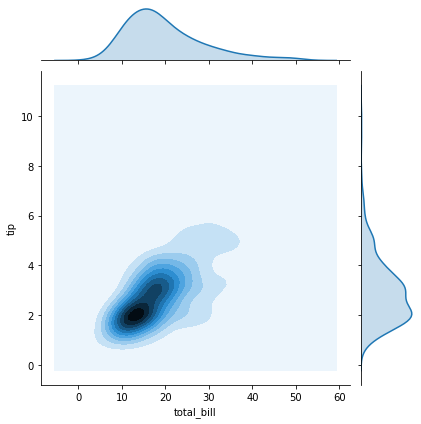

In [23]:
sns.jointplot(data=tips, x='total_bill', y = 'tip', kind='kde')
plt.show()

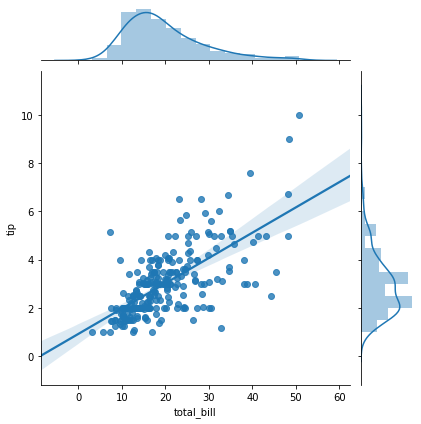

In [24]:
sns.jointplot(data=tips, x='total_bill', y = 'tip', kind='reg')
plt.show()

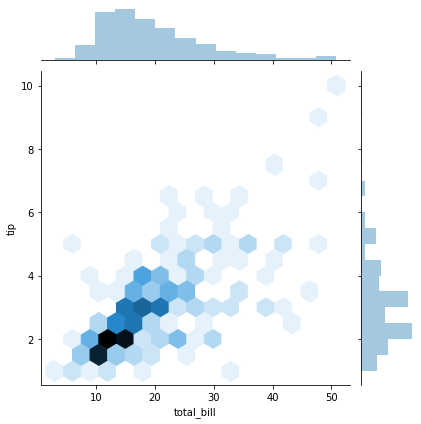

In [25]:
sns.jointplot(data=tips, x='total_bill', y = 'tip', kind='hexa')
plt.show()

# the darker the color in cube the more data points are in that region 

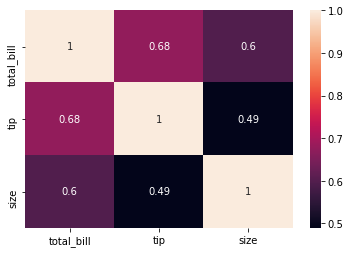

In [29]:
sns.heatmap(tips.corr(), annot=True)

In [30]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [35]:
cat_col = tips.select_dtypes('category').columns.to_list()
cat_col

['sex', 'smoker', 'day', 'time']

In [39]:
pd.merge?

In [41]:
for col in cat_col:
    col_dummies = pd.get_dummies(tips[col])
    tips = pd.merge(tips, col_dummies, right_index=True, left_index=True)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,Male,Female,Yes,No,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,0,1,0,0,0,1,0,1


In [45]:
tips.rename(columns ={"Yes": "Smoker", "No": "Non-Smoker"}, inplace=True)

In [48]:
# check if any missing value
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
Male          0
Female        0
Smoker        0
Non-Smoker    0
Thur          0
Fri           0
Sat           0
Sun           0
Lunch         0
Dinner        0
dtype: int64

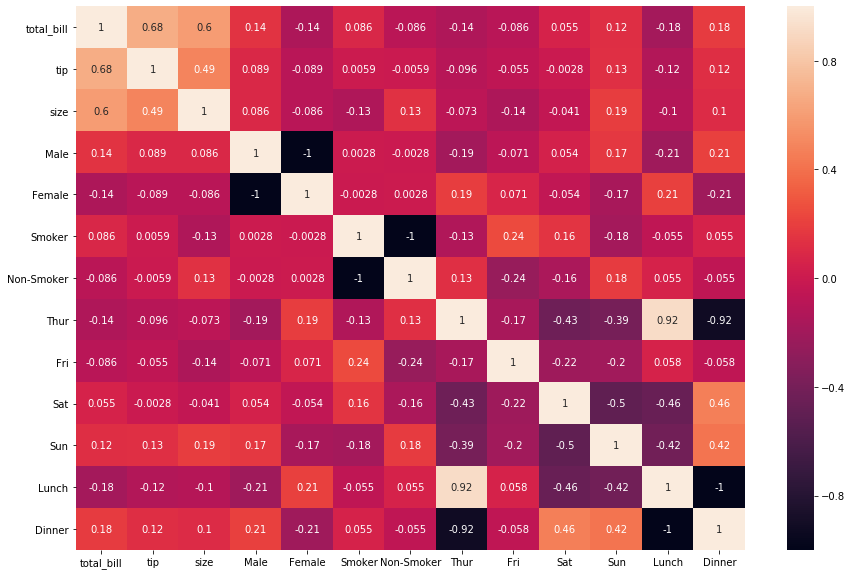

In [53]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(tips.corr(), annot=True)

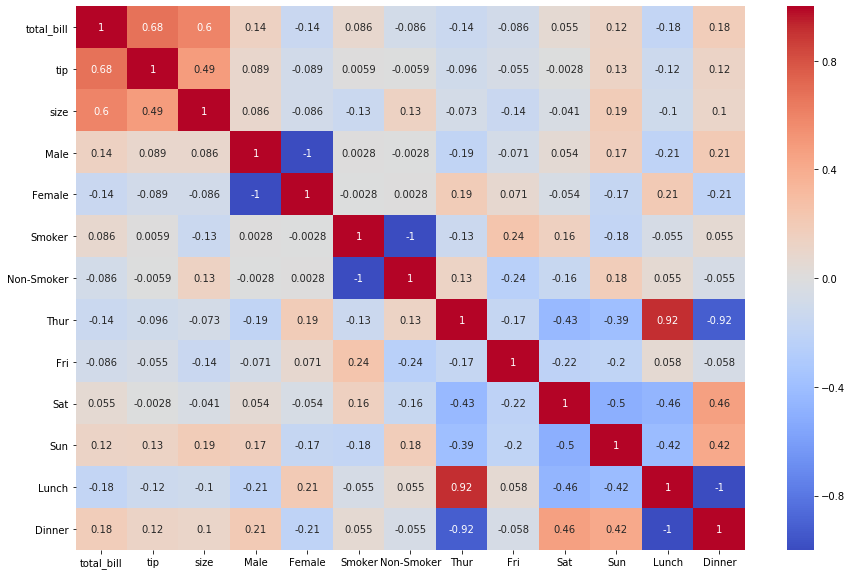

In [55]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(tips.corr(), annot=True, cmap= 'coolwarm')

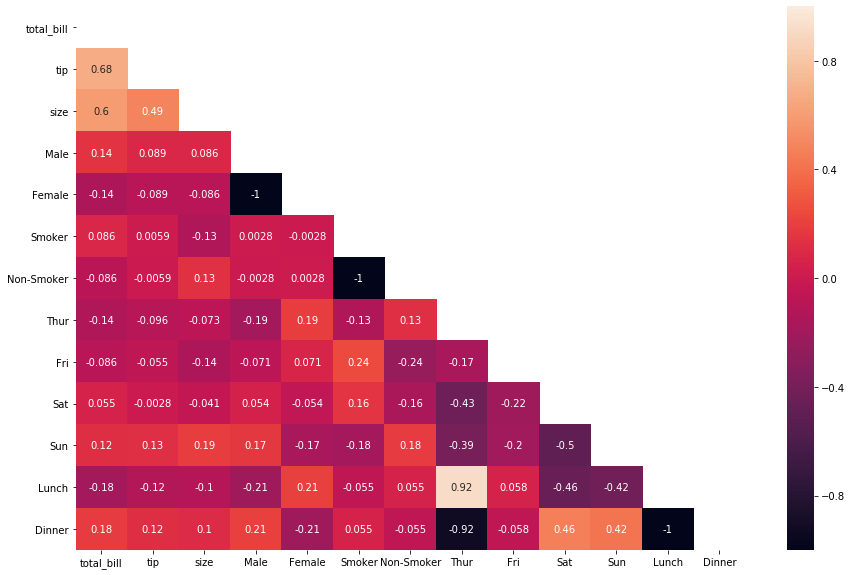

In [64]:
#.triu() is a method in NumPy that returns the lower triangle of any matrix given to it, 
#while .tril() returns the upper triangle of any matrix given to it.

mask = np.triu(tips.corr())
#mask = np.tril(tips.corr())
sns.heatmap(tips.corr(), annot=True, mask=mask)

In [69]:
np.corrcoef(tips['tip'], tips['total_bill'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [70]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
Male          244 non-null uint8
Female        244 non-null uint8
Smoker        244 non-null uint8
Non-Smoker    244 non-null uint8
Thur          244 non-null uint8
Fri           244 non-null uint8
Sat           244 non-null uint8
Sun           244 non-null uint8
Lunch         244 non-null uint8
Dinner        244 non-null uint8
dtypes: category(4), float64(2), int64(1), uint8(10)
memory usage: 9.6 KB


# Point Biserial needs categorical variable as numerically encoded, it does not take string as 'MALE', 'FEMALE'

In [95]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
d = np.random.choice(['Male','Female'],50)
col1= np.random.randint(1,10,50)


In [98]:
lb = LabelBinarizer()
dd = lb.fit_transform(d).flatten()
stats.pointbiserialr(col1, dd)

PointbiserialrResult(correlation=-0.05392924256536456, pvalue=0.7099203210146022)

In [99]:
dx = np.select([d == 'Male'],[1],0)
stats.pointbiserialr(col1, dx)


PointbiserialrResult(correlation=-0.05392924256536456, pvalue=0.7099203210146022)

In [101]:
le = LabelEncoder()
de = le.fit_transform(d)
stats.pointbiserialr(col1, de)


PointbiserialrResult(correlation=-0.05392924256536456, pvalue=0.7099203210146022)

In [102]:
de

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0])

In [103]:
dx

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0])

In [104]:
dd

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0])

# Correlations on Tips Dataset 
## Pre-Processing 
 - point biserial takes numeically encoded data ONLY
 

In [132]:
# point biserial takes numeically encoded data ONLY
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tips['day'] = le.fit_transform(tips['day'])
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['time'] = le.fit_transform(tips['time'])


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
5,25.29,4.71,1,0,2,0,4
6,8.77,2.00,1,0,2,0,2
7,26.88,3.12,1,0,2,0,4
8,15.04,1.96,1,0,2,0,2
9,14.78,3.23,1,0,2,0,2


In [127]:
cat_col = tips.select_dtypes('category').columns.to_list()

In [128]:
non_cat_col = [col for col in tips.columns if col not in cat_col]

# Correlation Between Numerical vs Numerical varaible
- Pearson 
- Spearman

In [180]:
tips.corr(method='pearson')

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


In [183]:
tips.corr(method='spearman')

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.678968,0.147717,0.061101,-0.043150,-0.208096,0.604791
tip,0.678968,1.000000,0.055982,0.016984,0.000714,-0.140286,0.468268
sex,0.147717,0.055982,1.000000,0.002816,-0.080269,-0.205231,0.096021
smoker,0.061101,0.016984,0.002816,1.000000,-0.279368,-0.054921,-0.129651
day,-0.043150,0.000714,-0.080269,-0.279368,1.000000,0.648896,0.021710
time,-0.208096,-0.140286,-0.205231,-0.054921,0.648896,1.000000,-0.164948
size,0.604791,0.468268,0.096021,-0.129651,0.021710,-0.164948,1.000000


# Correlation between Numerical and Categorical Varaible: 
## Point Biserial - binary variable vs continous variable
##  ?  - not a binary variable


In [178]:
from scipy.stats import pointbiserialr
significance_level = 0.05

def correlation_point_biserial_tips(col_1, col_2):
    
    res = pointbiserialr(tips[col_1], tips[col_2])
    
    if res.pvalue < significance_level:  # NULL must go 
        ret = 'Not Zero'
    else:
        ret = 'Zero'   # Not significant
        
    return (col_1,col_2, res.correlation, ret)        

In [179]:
tip_biserial_corr = []
#Correlation between non_categorical and categorical where each categorical varaible is a binary variable
cat_non_cat_list = ((non_cat,cat) for non_cat in non_cat_col for cat in cat_col)

for t in cat_non_cat_list:
    tip_biserial_corr.append(correlation_point_biserial_tips(t[0], t[1]))
    
tip_biserial_corr   

[('total_bill', 'sex', 0.14487733703816508, 'Not Zero'),
 ('total_bill', 'smoker', 0.08572125732284783, 'Zero'),
 ('total_bill', 'day', -0.043549673517692414, 'Zero'),
 ('total_bill', 'time', -0.18311760533651478, 'Not Zero'),
 ('tip', 'sex', 0.08886206109073631, 'Zero'),
 ('tip', 'smoker', 0.005928539527806663, 'Zero'),
 ('tip', 'day', -0.011547626187567175, 'Zero'),
 ('tip', 'time', -0.12162906226028675, 'Zero'),
 ('size', 'sex', 0.08619481538252455, 'Zero'),
 ('size', 'smoker', -0.13317824602877704, 'Not Zero'),
 ('size', 'day', 0.06951045858232471, 'Zero'),
 ('size', 'time', -0.10341090969324013, 'Zero')]

# Correlation between categorical vs categorical varaibles: chi_squared 

In [163]:
from scipy.stats import chi2_contingency

significance_level = 0.05

def correlation_chi_square_tips(col_1, col_2):
    ret = ''    
    observed_freq = pd.crosstab(tips[col_1], tips[col_2]).to_numpy()
    chi, pvalue, ddof, expected = chi2_contingency(observed_freq)

    if pvalue < significance_level:  # NULL must go 
        ret = 'Dependent'
    else: 
        ret ='Independent'  
        
    return (col_1, col_2, ret)       

In [165]:
from itertools import combinations
cat_corr =[]
for combo in combinations(cat_col, 2):
    cat_corr.append(correlation_chi_square_tips(combo[0], combo[1]))

cat_corr   

[('sex', 'smoker', 'Independent'),
 ('sex', 'day', 'Dependent'),
 ('sex', 'time', 'Dependent'),
 ('smoker', 'day', 'Dependent'),
 ('smoker', 'time', 'Independent'),
 ('day', 'time', 'Dependent')]